In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import requests
import json
from census import Census
import gmaps

# Import API key
from config import g_key


In [ ]:
# Import the fast food data file 
fastfood_data = pd.read_csv('resources/clean_fast_food.csv')
fastfood_data


In [4]:
# Import the combined fast food - obesity - population data file 
combined_fastfood= pd.read_csv('resources/clean_all_combined.csv')
combined_fastfood


,Address,Category,City,Country,Latitude,Longitude,Name,ZipCode,State,Prevalence,95% CI,Total Population
0,800 N Canal Blvd,American Restaurant and Fast Food Restaurant,Thibodaux,US,29.814697,-90.814742,SONIC Drive In,70301,Louisiana,38.1,"(36.2, 40.1)",2073200
1,1737 N University Ave,Fast Food Restaurants,Lafayette,US,30.252668,-92.037149,McDonald's,70507,Louisiana,38.1,"(36.2, 40.1)",2073200
2,1051 W Maple Ave,Fast Food Restaurants,Eunice,US,30.486970,-92.426480,Krispy Krunchy Chicken,70535,Louisiana,38.1,"(36.2, 40.1)",2073200
3,3000 Maplewood Dr,Fast Food Restaurants,Sulphur,US,30.227514,-93.343155,Pizza Hut,70663,Louisiana,38.1,"(36.2, 40.1)",2073200
4,6464 Siegen Ln,Fast Food Restaurants,Baton Rouge,US,30.390990,-91.061560,Arby's,70809,Louisiana,38.1,"(36.2, 40.1)",2073200
...,...,...,...,...,...,...,...,...,...,...,...,...
9297,850 Manton Ave,Fast Food Restaurants,Providence,US,41.832526,-71.465840,Wendy's,2909,Rhode Island,30.1,"(28.2, 32.1)",483474
9298,580 Chalkstone Ave,Fast Food Restaurants,Providence,US,41.834918,-71.426043,Pizza Hut,2908,Rhode Island,30.1,"(28.2, 32.1)",483474
9299,4000 Chapel View Boulevard,Fast Food Restaurants,Cranston,US,41.756170,-71.458551,Panera Bread,2920,Rhode Island,30.1,"(28.2, 32.1)",483474
9300,650 Bald Hill Rd,Fast Food Restaurants,Warwick,US,41.720180,-71.483700,SUBWAY,2886,Rhode Island,30.1,"(28.2, 32.1)",483474


In [ ]:
# Configure gmaps
gmaps.configure(api_key=g_key)

In [ ]:
obesity_data= pd.read_csv('resources/obesity_data_state_2020.csv')


In [ ]:
# Build a dataframe that has city, lat and long. Remove the dups. 
locations = fastfood_data[["City", "Latitude", "Longitude"]].drop_duplicates()


In [ ]:
#Group the fast food data by city and count the number of fast food places in each city. 
fast_food_totals = fastfood_data.groupby("City")[['Index']].count()
fast_food_totals

In [ ]:
#rename the index column to the fast food count 
fast_food_totals.rename(columns = {'Index' : 'Fast Food Count'}, inplace = True)


In [ ]:
# create a data frame that has city, fast food count, lat and long - merging the grouped df with the locations
fast_food_by_city= pd.merge(fast_food_totals, locations, how = 'right', on = 'City')
fast_food_by_city.head(30)

In [ ]:
#prep the parameters for teh heat map 
locations = fast_food_by_city[["Latitude", "Longitude"]]
ff_count = fast_food_by_city["Fast Food Count"].astype(float)

In [ ]:

# Plot Heatmap
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=ff_count, 
                                 dissipating=False, max_intensity=200,
                                 point_radius=1)

# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Text(0.5, 1.0, 'Fast Food and Obesity Rates by State')

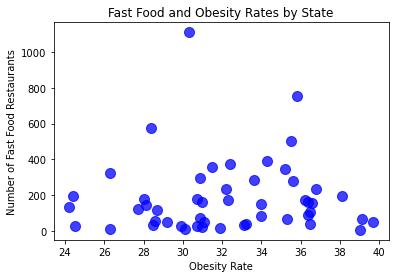

In [36]:
#Julia work - fast food quantity by obesity by state

#group combined df by date
fast_food_restaurant = combined_fastfood.groupby("State")

#find count of fast food chain by state
fast_food_count = fast_food_restaurant["Name"].count()
fast_food_count

#remove state duplicates from combined data
clean_combined_obesity = combined_fastfood.drop_duplicates('State')

#group cleaned dats by state
clean_obesity_group = clean_combined_obesity.groupby("State")

#find obesity rate per state
obesity_rate = clean_obesity_group['Prevalence'].mean()
obesity_rate

plt.scatter(obesity_rate, fast_food_count, marker ="o", facecolors="blue", s=100, alpha=0.75)
plt.xlabel("Obesity Rate")
plt.ylabel("Number of Fast Food Restaurants")
plt.title("Fast Food and Obesity Rates by State")

TypeError: count() takes exactly one argument (0 given)

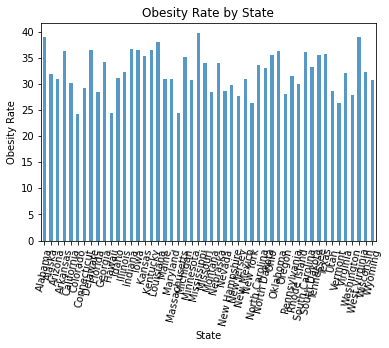

In [89]:
#empty list for state
states_count = [combined_fastfood["State"].nunique()]

Obesity_by_state = obesity_rate.plot(kind="bar", title= "Obesity Rate by State", alpha=0.75, rot=78, width =0.5)
Obesity_by_state.set_xlabel("State")
Obesity_by_state.set_ylabel("Obesity Rate")

tick_locations = [value for value in states_list.count()]
plt.xticks(tick_locations, states_list)

In [87]:
states_list = [
'Alaska',
'Arizona',
'Arkansas',
'California',
'Colorado',
'Connecticut',
'Delaware',
'Florida',
'Georgia',
'Hawaii',
'Idaho',
'Illinois',
'Indiana',
'Iowa',
'Kansas',
'Kentucky',
'Louisiana',
'Maine',
'Maryland',
'Massachusetts',
'Michigan',
'Minnesota',
'Mississippi',
'Missouri',
'Montana',
'Nebraska',
'Nevada',
'New Hampshire',
'New Jersey',
'New Mexico',
'New York',
'North Carolina',
'North Dakota',
'Ohio',
'Oklahoma',
'Oregon',
'Pennsylvania',
'Rhode Island',
'South Carolina',
'South Dakota',
'Tennessee',
'Texas',
'Utah',
'Vermont',
'Virginia',
'Washington',
'West Virginia',
'Wisconsin',
'Wyoming'
]

In [ ]:
#Nicole Work - fast food per capita